## –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –∏ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–π

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rm
import numpy as np
from numpy.random import default_rng
import pandas as pd
import time

rng = default_rng()

In [2]:
def str2int_arr(str):
    return np.array([float(i) for i in str], dtype="byte")

def graph_from_file(file):
    w = []
    with open(file, "r") as f:
        for line in f:
            arr = line.split()
            map(int, arr)
            w.append(str2int_arr(arr))
    return nx.from_numpy_matrix(np.array(w))

def graph_from_dimacs(file):
    G = nx.Graph()
    with open(file, "r") as f:
        for line in f:
            buff = line.split()
            if buff[0]=="p":
                G.add_nodes_from([i for i in range(1, int(buff[2])+1 )])
                break
        for line in f:
            edge = line.split()
            G.add_edge(int(edge[1]), int(edge[2]))
    return G

In [3]:
def f_activations(x):
    return 1 / ( 1 + np.exp(x) )

def f_act01(x):
    return 1 if x > 0 else 0

def energy(X, W, B=1):
    sum = 0  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä—ë–±–µ—Ä
    n = np.sum(X)  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–µ—Ä—à–∏–Ω
    full_eges = -n*(n-1)//2# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–±–µ—Ä –≤ –ø–æ–ª–Ω–æ–º –≥—Ä–∞—Ñ–µ –Ω–∞ n –≤–µ—Ä—à–∏–Ω
    
    for i in range(len(X)):
        for j in range(i, len(X)):
            sum += W[i, j]*X[i]*X[j]

    return n + (full_eges + sum)*2*B, n, full_eges+sum 
    
def multy_mutation(individual):
    n = individual.size
    num_mutation=n//3
    
    for _ in range(num_mutation):
        individual[np.random.randint(0, n)] ^= 1
    return individual

def NN(W, X ,B=0.5, times=1000, unchanged_threshold=20):
    N = X.size
    h_i = 1
    
    energies = np.array([], dtype="int")
    xs = []
    max_en = 0
    max_node = 0
    missing_edges = 0
    unchanged_count = 0
    iter = 0
    

    for iteration in range(times):
        
        iter += 1
        neuron_nums = rm.sample(range(1, N), 5)
        for neuron in neuron_nums:
            X_next = 0
            for j in range(N):
                X_next += (1-W[neuron, j])*X[j]
            X_next = f_act01(X_next*(-B) + h_i)

            X[neuron] = X_next

        if iteration > times*0.8:
            
            ener = energy(X, W, B)
            energies = np.append(energies, ener[0])
            xs.append(X.copy())
            
            if max_en == ener[0]:
                unchanged_count += 1
                if unchanged_count >= unchanged_threshold:
                    break
            else:
                unchanged_count = 0
                
            if max_en < ener[0]:
                max_en = ener[0]
                max_node = ener[1]
                missing_edges = ener[2]
        
            
            
            # print(X)
        
    return X, energies, xs, max_en, max_node, missing_edges#, iter

## –ó–∞–≥—Ä—É–∑–∫–∞ –≥—Ä–∞—Ñ–∞

In [72]:
#G = graph_from_file("graph_examples/34_14")
G = graph_from_dimacs("data/DIMACS_subset_ascii/C1000.9.clq")
W = nx.adjacency_matrix(G).todense()
# nx.draw(G, with_labels=True)

C:\Users\arkad\AppData\Local\Temp\ipykernel_988\1190627997.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


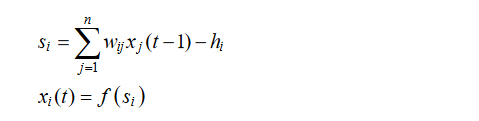

## –ó–∞–ø—É—Å–∫ –∞–ª–≥–æ—Ä–∏—Ç–º–∞

In [19]:
X = np.ones(G.number_of_nodes(), dtype="byte")
X, energies, xs, max_en, max_node, missing_edges = NN(W, X, 0.6, 1000)

In [20]:
print(max_en, max_node, missing_edges)

30.8 32 -1


In [17]:
energies[-1]

33.2

## NN

In [18]:
G = graph_from_dimacs("data/DIMACS_subset_ascii/C125.9.clq")
W = nx.adjacency_matrix(G).todense()

C:\Users\arkad\AppData\Local\Temp\ipykernel_8716\469711292.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


In [19]:
df = pd.DataFrame(columns=['hi', 'number of iterations', 'number of runs', 'best score',"average score" , 'time'])

In [20]:
#----------Hyperparameters----------
hi = 0.6
iterations = 1500
number_of_runs = 5
#-----------#-----------#----------- 

In [21]:
def mult_hop(num_parameter, arr, hi, iterations, number_of_runs, df):
    for i in arr:
        
        start_time = time.time()
        input = [hi, iterations, number_of_runs]
        input[num_parameter] = i 
        result = 0
        avg = 0
        
        for _ in range(input[2]):
            X = np.ones(G.number_of_nodes(), dtype="byte")
            X, energies, xs, max_en, max_node, missing_edges = NN(W, X, input[0], input[1])
            
            out_V = max_node+missing_edges
            avg += out_V
            result = max(result, out_V)

        avg = avg / input[2]
        df.loc[len(df)] = [*input, result, avg, (time.time() - start_time)]

In [22]:
hi_arr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9]
mult_hop(0, hi_arr, hi, iterations, number_of_runs, df)

In [23]:
iterations_arr = [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 7500, 10000]
mult_hop(1, iterations_arr, hi, iterations, number_of_runs, df)

In [78]:
nor_arr = [2, 3, 5, 10, 15, 25]
mult_hop(2, nor_arr, hi, iterations, number_of_runs, df)

In [24]:
df

hi  number of iterations  number of runs  best score  average score   
0   0.10                1500.0             5.0         0.0         -138.2  \
1   0.20                1500.0             5.0        18.0           15.0   
2   0.30                1500.0             5.0        28.0           27.2   
3   0.40                1500.0             5.0        33.0           32.4   
4   0.50                1500.0             5.0        34.0           32.8   
5   0.55                1500.0             5.0        34.0           33.8   
6   0.60                1500.0             5.0        34.0           33.4   
7   0.65                1500.0             5.0        34.0           33.6   
8   0.70                1500.0             5.0        34.0           34.0   
9   0.75                1500.0             5.0        34.0           34.0   
10  0.80                1500.0             5.0        34.0           32.4   
11  0.90                1500.0             5.0        34.0           33.8   
12  0.60                 100.0             5.0        29.0           25.8   
13  0.60                 200.0             5.0        32.0           30.0   
14  0.60                 300.0             5.0        33.0           31.8   
15  0.60                 400.0             5.0        33.0           31.4   
16  0.60                 500.0             5.0        33.0           32.6   
17  0.60                 600.0             5.0        34.0           32.2   
18  0.60                 800.0             5.0        34.0           32.0   
19  0.60                1000.0             5.0        34.0           33.6   
20  0.60                1500.0             5.0        34.0           33.2   
21  0.60                2000.0             5.0        34.0           33.8   
22  0.60                2500.0             5.0        34.0           33.4   
23  0.60                3000.0             5.0        34.0           32.8   
24  0.60                4000.0             5.0        34.0           34.0   
25  0.60                5000.0             5.0        34.0           34.0   
26  0.60                7500.0             5.0        34.0           34.0   
27  0.60               10000.0             5.0        34.0           33.4   

          time  
0    14.714665  
1    23.905469  
2    24.499444  
3    21.217454  
4     6.583242  
5    24.454852  
6    24.981683  
7    24.421193  
8    24.360543  
9    23.587244  
10   23.582192  
11   25.150949  
12    1.400227  
13    3.237649  
14    4.995928  
15    6.417055  
16    7.850194  
17    9.745097  
18   12.904083  
19   15.647082  
20   23.170980  
21   31.485068  
22   36.202213  
23   48.120148  
24   63.057118  
25   79.050859  
26  106.473349  
27  134.274340

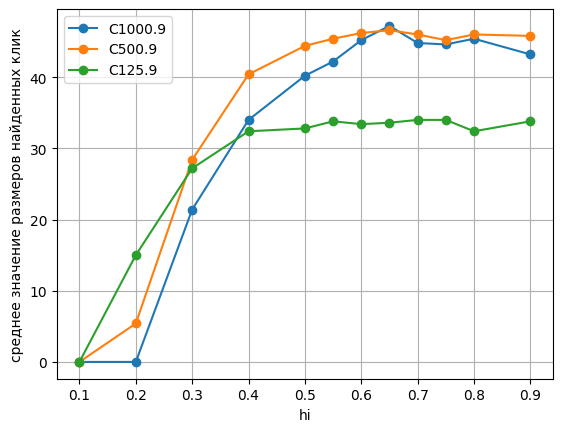

In [30]:
df_xl = pd.read_excel("data2.xlsx", sheet_name='1')
df_x2 = pd.read_excel("data2.xlsx", sheet_name='3')
df_x3 = pd.read_excel("data2.xlsx", sheet_name='5')

plt.plot(df_xl['hi'], df_xl['average score'], marker='o', label="C1000.9")  
plt.plot(df_x2['hi'], df_x2['average score'], marker='o', label="C500.9")
plt.plot(df_x3['hi'], df_x3['average score'], marker='o', label="C125.9")
#plt.title('–í—ã—Ä—É—á–∫–∞ –∫–æ–º–ø–∞–Ω–∏–∏ –ø–æ –≥–æ–¥–∞–º')  # –ó–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞
plt.xlabel('hi')  

plt.ylabel('—Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–æ–≤ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –∫–ª–∏–∫')  

plt.grid(True)  
plt.legend()
plt.show() 

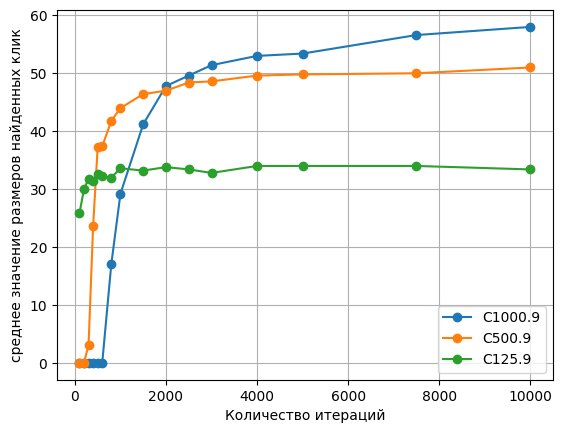

In [32]:
df_xl = pd.read_excel("data2.xlsx", sheet_name='2')
df_x2 = pd.read_excel("data2.xlsx", sheet_name='4')
df_x3 = pd.read_excel("data2.xlsx", sheet_name='6')

plt.plot(df_xl['number of iterations'], df_xl['average score'], marker='o', label="C1000.9")  
plt.plot(df_x2['number of iterations'], df_x2['average score'], marker='o', label="C500.9")
plt.plot(df_x3['number of iterations'], df_x3['average score'], marker='o', label="C125.9")
#plt.title('–í—ã—Ä—É—á–∫–∞ –∫–æ–º–ø–∞–Ω–∏–∏ –ø–æ –≥–æ–¥–∞–º')  # –ó–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π')  

plt.ylabel('—Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–æ–≤ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –∫–ª–∏–∫')  

plt.grid(True)  
plt.legend()
plt.show() 

## –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –≥—Ä–∞—Ñ–∞—Ö –∏–∑ DIMACS

In [7]:
DIMACS = ["C125.9",
        "C250.9",
        "C500.9",
        "C1000.9",
        "C2000.9",
        #"DSJC1000_5",
        #"DSJC500_5",
        "C2000.5",
        "C4000.5",
        "MANN_a27",
        "MANN_a45",
        #"MANN_a81",
        "brock200_2",
        "brock200_4",
        "brock400_2",
        "brock400_4",
        "brock800_2",
        "brock800_4",
        "gen200_p0.9_44",
        "gen200_p0.9_55",
        "gen400_p0.9_55",
        "gen400_p0.9_65",
        "gen400_p0.9_75",
        "hamming10-4",
        "hamming8-4",
        "keller4",
        "keller5",
        #"keller6",
        "p_hat300-1",
        "p_hat300-2",
        "p_hat300-3",
        "p_hat700-1",
        "p_hat700-2",
        "p_hat700-3",
        "p_hat1500-1",
        "p_hat1500-2",
        "p_hat1500-3"]

In [8]:
df_dim = pd.DataFrame(columns=["Benchmark", "NN ùùé(G)", "NN Time [s]"])

In [11]:
for graph_number in range(len(DIMACS)):
    G = graph_from_dimacs("data/DIMACS_subset_ascii/"+ DIMACS[graph_number] +".clq")
    W = nx.adjacency_matrix(G).todense()
    
    start_time = time.time()
    X = np.ones(G.number_of_nodes(), dtype="byte")
    X, energies, xs, max_en, max_node, missing_edges = NN(W, X, 0.6, 10000, unchanged_threshold=50)
    
    df_dim.loc[len(df_dim)] = [DIMACS[graph_number], max_node+missing_edges, (time.time() - start_time)]
    
    print("done ", graph_number)

C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  0


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  1


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  2


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  3


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  4


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  5


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  6


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  7


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  8


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  9


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  10


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  11


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  12


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  13


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  14


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  15


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  16


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  17


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  18


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  19


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  20


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  21


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  22


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  23


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  24


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  25


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  26


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  27


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  28


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  29


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  30


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  31


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2912086180.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  32


In [15]:
df_dim[33:]

Benchmark  NN ùùé(G)  NN Time [s]
33          C125.9       34    21.027260
34          C250.9       40    28.872139
35          C500.9       50   108.862094
36         C1000.9       58   179.961964
37         C2000.9       64   146.878269
38         C2000.5       13  1200.860273
39         C4000.5        9   880.325724
40        MANN_a27      120   131.972855
41        MANN_a45      332   944.187472
42      brock200_2        8    14.132812
43      brock200_4       14    41.209861
44      brock400_2       21    20.198761
45      brock400_4       23    32.515356
46      brock800_2       17    50.334602
47      brock800_4       17    35.515526
48  gen200_p0.9_44       36    41.000935
49  gen200_p0.9_55       50    57.915668
50  gen400_p0.9_55       51   165.214843
51  gen400_p0.9_65       46   145.395482
52  gen400_p0.9_75       74    17.732616
53     hamming10-4       35    58.802366
54      hamming8-4       16     8.784800
55         keller4       11    29.479104
56         keller5       23   101.828098
57      p_hat300-1        6    83.656157
58      p_hat300-2       16    86.783579
59      p_hat300-3       28    83.463906
60      p_hat700-1        7    30.085676
61      p_hat700-2       34   534.031431
62      p_hat700-3       55   449.327515
63     p_hat1500-1        9   100.774035
64     p_hat1500-2       65    99.308843
65     p_hat1500-3       86  1002.718284

## GA -> NN

In [16]:
df = pd.DataFrame(columns=['hi', 'number of iterations', 'number of runs', 'best score',"average score" , 'time'])

In [23]:
import pickle
with open('data/graphFromGaToHop/C500.9.pkl', 'rb') as input:
    pop_ga = pickle.load(input)
print(len(pop_ga))

40


In [ ]:
start_time = time.time()
out_energ = []
result = 0
avg = 0

for x in pop_ga:
    X = x
    X, energies, xs, max_en, max_node, missing_edges = NN(W, X, hi, iterations)
    out_V = max_node+missing_edges
    avg += out_V
    result = max(result, out_V)

avg = avg / len(pop_ga)
df.loc[len(df)] = [hi, iterations, len(pop_ga), result, avg, (time.time() - start_time)]

In [ ]:
df

hi  number of iterations  number of runs  best score  average score   
0  0.6                1500.0            40.0        37.0         34.825  \

         time  
0  303.146555

### GA -> NN DIMACS

In [25]:
from os import listdir
from os.path import isfile, join
ga_dimacs = [f for f in listdir("data/graphFromGaToHop") if isfile(join("data/graphFromGaToHop", f))]

In [45]:
df_dim = pd.DataFrame(columns=["Benchmark", "NN ùùé(G)", "NN Time [s]"])

In [46]:
for graph_number in range(len(DIMACS)):
    G = graph_from_dimacs("data/DIMACS_subset_ascii/"+ DIMACS[graph_number] +".clq")
    W = nx.adjacency_matrix(G).todense()
    with open('data/graphFromGaToHop/' + DIMACS[graph_number] + '.pkl', 'rb') as input:
        pop_ga = pickle.load(input)
    
    
    start_time = time.time()
    # X = np.ones(G.number_of_nodes(), dtype="byte")
    X = pop_ga[0]
    X, energies, xs, max_en, max_node, missing_edges = NN(W, X, 0.6, 4000, unchanged_threshold=40)
    
    df_dim.loc[len(df_dim)] = [DIMACS[graph_number], max_node+missing_edges, (time.time() - start_time)]
    
    print("done ", graph_number)

C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  0


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  1


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  2


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  3


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  4


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  5


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  6


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  7


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  8


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  9


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  10


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  11


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  12


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  13


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  14


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  15


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  16


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  17


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  18


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  19


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  20


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  21


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  22


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  23


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  24


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  25


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  26


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  27


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  28


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  29


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  30


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  31


C:\Users\arkad\AppData\Local\Temp\ipykernel_14688\2448206681.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


done  32


In [47]:
df_dim

Benchmark  NN ùùé(G)  NN Time [s]
0           C125.9       34     7.605123
1           C250.9       43    35.509870
2           C500.9       49   134.981685
3          C1000.9       55    57.221195
4          C2000.9       58  1111.331763
5          C2000.5       12   144.178597
6          C4000.5       11  1301.870866
7         MANN_a27      117    87.610566
8         MANN_a45      331   510.951844
9       brock200_2        9    26.227097
10      brock200_4       16     8.766173
11      brock400_2       22    27.252982
12      brock400_4       22    25.794852
13      brock800_2       18    76.758925
14      brock800_4       17   214.888173
15  gen200_p0.9_44       40    15.259080
16  gen200_p0.9_55       39    16.323397
17  gen400_p0.9_55       48    53.564466
18  gen400_p0.9_65       47    58.067757
19  gen400_p0.9_75       50    56.032398
20     hamming10-4       33   429.819067
21      hamming8-4       16     7.540444
22         keller4       11    23.266370
23         keller5       20   359.769950
24      p_hat300-1        7     9.359051
25      p_hat300-2       25    31.409853
26      p_hat300-3       33    59.646242
27      p_hat700-1        9    27.260685
28      p_hat700-2       42    28.764077
29      p_hat700-3       61   264.210161
30     p_hat1500-1       10    54.333562
31     p_hat1500-2       62   327.134282
32     p_hat1500-3       79  1063.757272